In [ ]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
wisconsin = datasets.load_breast_cancer()
print(f"Keys from original dataset: {wisconsin.keys()}")

Keys from original dataset: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
print(wisconsin.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
"""
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(wisconsin.data), columns=wisconsin.feature_names)
"""

df = pd.DataFrame(wisconsin.data, columns=wisconsin.feature_names)
df['cell type'] = wisconsin.target
print(f"There are {len(df['cell type'])} instances: {df['cell type'].sum()} are benign, {(df['cell type'] == 0).sum()} are malignant")

There are 569 instances: 357 are benign, 212 are malignant


In [ ]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'cell type'],
      dtype='object')

In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cell type
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


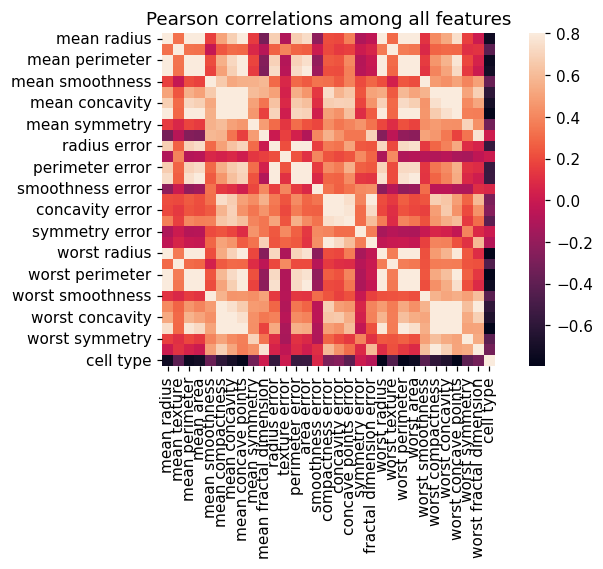

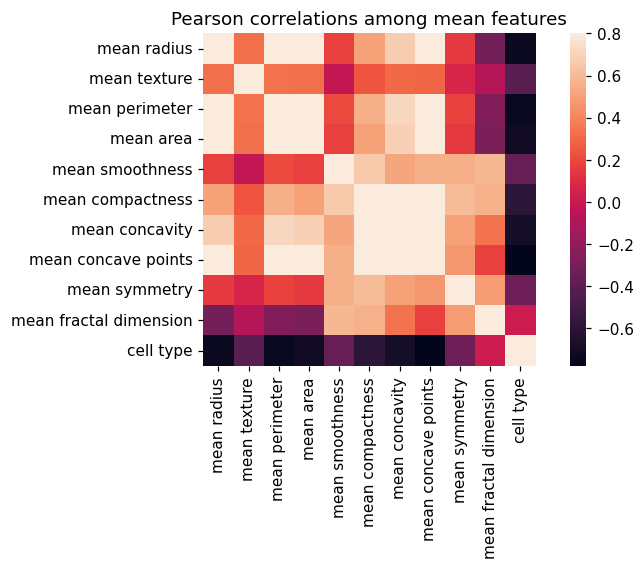

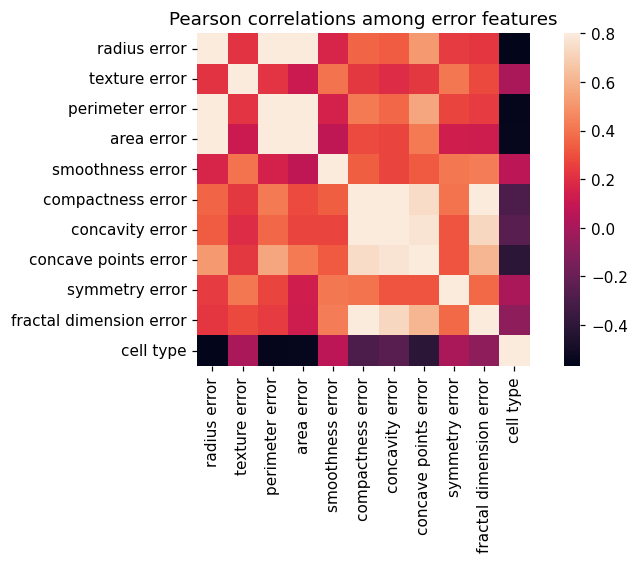

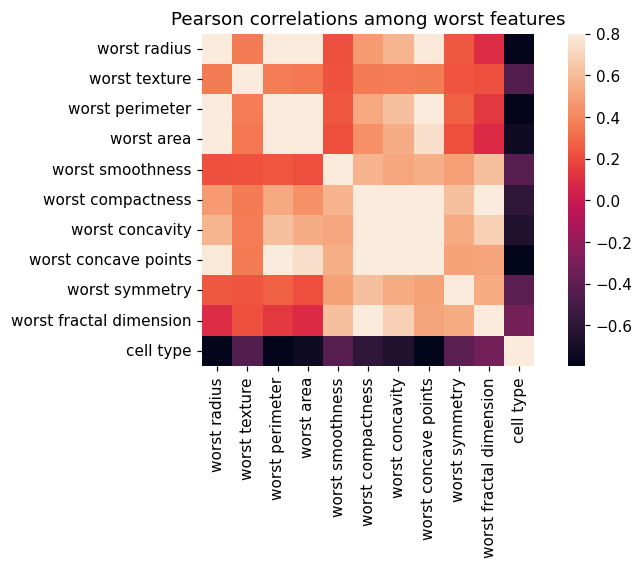

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(8, 4), dpi=110)
sns.heatmap(corrmat, vmax=.8, square=True)
ax.set_title('Pearson correlations among all features')

tmp1 = df.loc[:,['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'cell type']]
corrmat = tmp1.corr()
f, ax = plt.subplots(figsize=(8, 4), dpi=110)
sns.heatmap(corrmat, vmax=.8, square=True)
ax.set_title('Pearson correlations among mean features')
plt.show()

tmp2 = df.loc[:,['radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'cell type']]
corrmat = tmp2.corr()
f, ax = plt.subplots(figsize=(8, 4), dpi=110)
sns.heatmap(corrmat, vmax=.8, square=True)
ax.set_title('Pearson correlations among error features')
plt.show()

tmp3 = df.loc[:,['worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension', 'cell type']]
corrmat = tmp3.corr()
f, ax = plt.subplots(figsize=(8, 4), dpi=110)
sns.heatmap(corrmat, vmax=.8, square=True)
ax.set_title('Pearson correlations among worst features')
plt.show()

### Observations

- Negative correlations of cell type with a lot of features --> e.g. larger cells are more likely to be malignant
- All three features have the same pattern in the heatmap
- The errors with mean and the errors with worst have the pattern to a lesser extent
- Describe certain correlations between certain features (e.g. radies and perimeter/area)

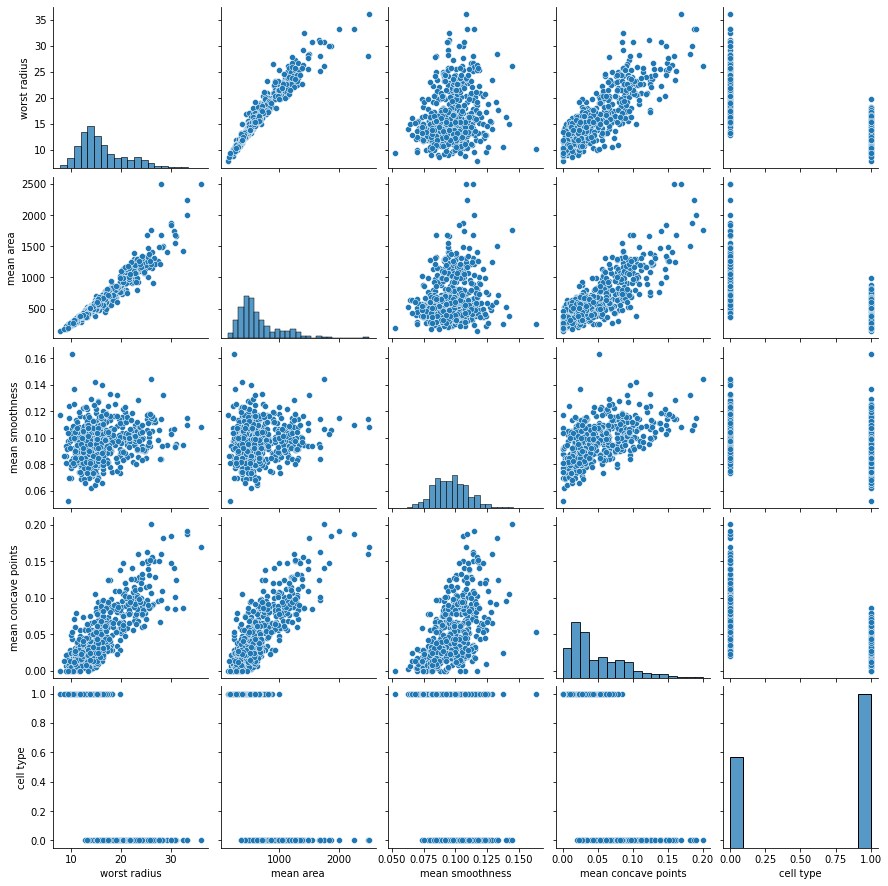

In [ ]:
tmp = df.loc[:,['worst radius', 'mean area', 'mean smoothness', 'mean concave points', 'cell type']]
sns.pairplot(tmp)
plt.show()

### Observations
- Mean radius, area and concave points were chosen because they are highly correlated with cell type (and with each other). This can be seen on the plots.
- Mean smoothness was chosen to illustrate a feature with less correlation.

In [ ]:
## Get a table with counts of missing values per variable (sorted)
total = df.isnull().sum().sort_values(ascending=False)
total.head(5)

mean radius                0
concavity error            0
worst fractal dimension    0
worst symmetry             0
worst concave points       0
dtype: int64

No missing data, yay!

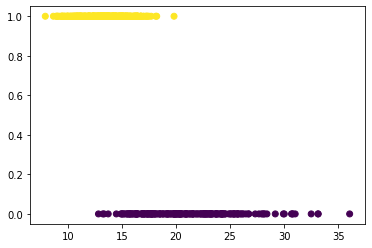

In [ ]:
plt.scatter(df["worst radius"], df["cell type"], c=df["cell type"])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=90a57419-7b7b-4aa4-8a97-858f9f98a849' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>